# CEAD ML project on the Ringenprinter. 
#### Welcome to the Notebook in which I will explore and visualize the data of the collected data.  

#### Material: PET-G 30% Glass Fiber
#### Datasets: petg30gf_4ud_T215_270-2023-01-17_pt1.csv en petg30gf_4ud_T215_270-2023-01-17_pt2.csv

## Doel
Om naar de temperatuur als variabele te kijken wat de responsietijd is.


In [1]:
# imports
# system related
import sys
import subprocess
import importlib

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import itertools
from datetime import datetime
from time import time


# ml related
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# import scripts and functions
from functions import *
import TransitionAnalyse
from TransitionAnalyse import TransitionAnalyse as TA

print('imports succesfull')

# settings of pandas, usefull for data exploration
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
# if reset is required:
# pd.reset_option('all')

# increasing standard image size
matplotlib.rcParams['figure.figsize'] = (14, 7)

print('changing pandas and image settings succesfull')

imports succesfull
changing pandas and image settings succesfull


## IMPORTING AND PREPROCESSING DATA

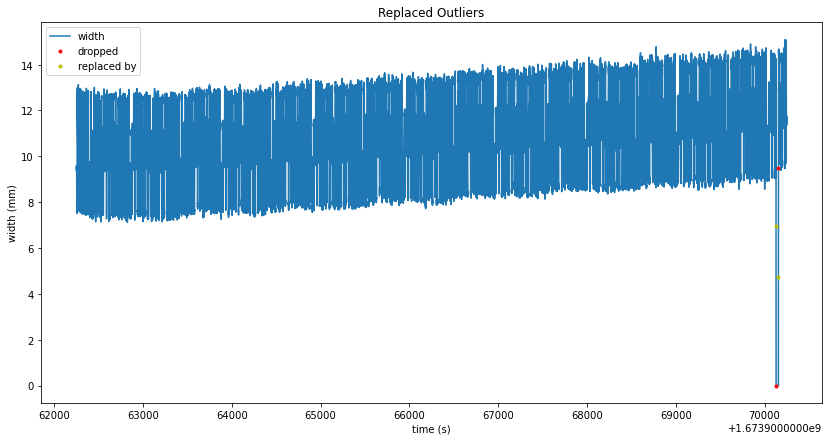

outliers detected and replaced
data median filtered
index reset
index reset


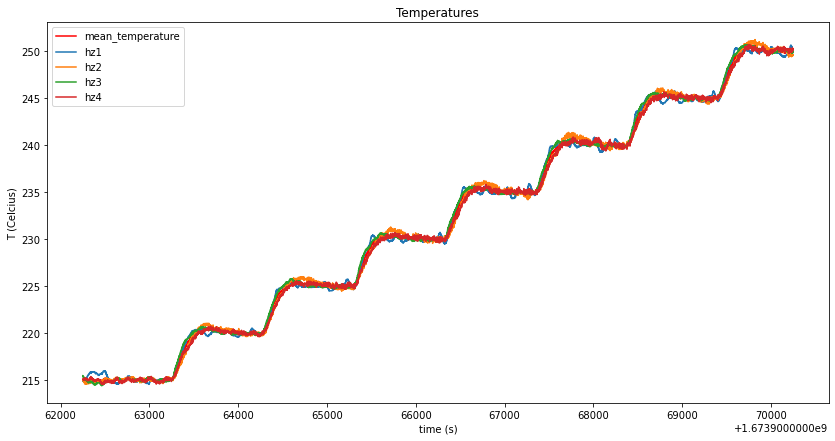

outliers detected and replaced
index reset
index reset


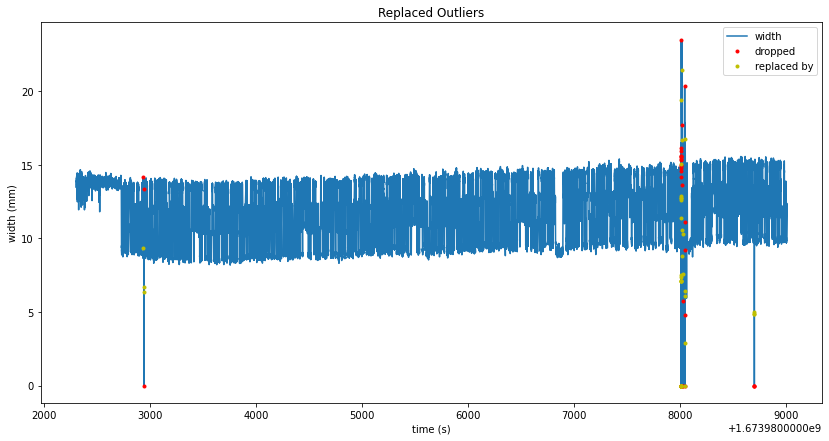

outliers detected and replaced
data median filtered
index reset
index reset


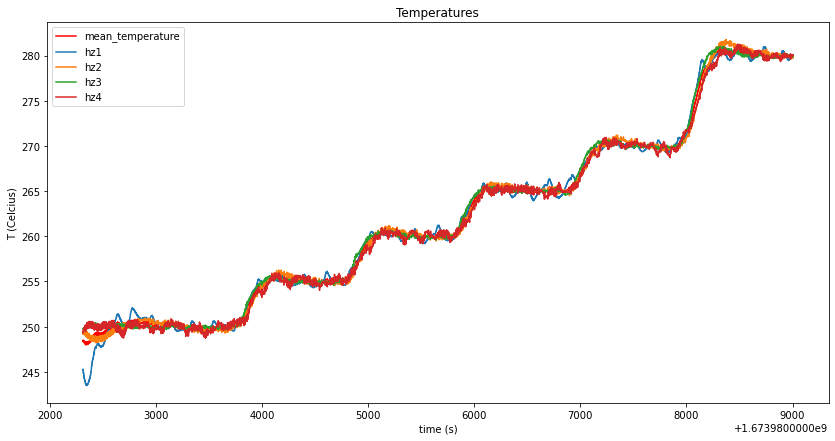

outliers detected and replaced
index reset
index reset

import and preprocessing data succesfull


In [14]:
# Defining import variables

temps1 = np.array(range(215, 255, 5))
temps2 = np.array(list(range(250, 275, 5)) + [280])

one = 16739e5
two = 167398e4


path1 = '../data/petg30gf_4ud_T215_270-2023-01-17_pt1.csv'
# whole data set 1
start1 = one+62250
end1   = one+70250
#      Temperature is:   [215    220    225    230    235    240    245  250]
starts1 = one + np.array([62250, 63600, 64650, 65700, 66700, 67700, 68750, 69700])
ends1   = one + np.array([63250, 64300, 65300, 66350, 67350, 68400, 69400, 70100])


path2 = '../data/petg30gf_4ud_T215_270-2023-01-17_pt2.csv'
# whole data set 2
start2 = two+2307.35
end2   = two+9007.35
#      Temperature is:   [250   255   260   265   270   280]
starts2 = two + np.array([2950, 4200, 5200, 6150, 7300, 8200])
ends2   = two + np.array([3800, 4800, 5800, 6900, 7900, 9100])

# import, filter, outlier replacement and median filtering on bead_width (mm)
df1 = import_csv_filt(path1, start1, end1, plot_outliers=True, outlier_window = 8, make_time_rel=False, plot_T = True)
df1_nf = import_csv_filt(path1, start1, end1, median_filt=False, outlier_window = 8)

df2 = import_csv_filt(path2, start2, end2, plot_outliers=True, outlier_window = 8, make_time_rel=False, plot_T = True)
df2_nf = import_csv_filt(path2, start2, end2, median_filt=False, outlier_window = 8)

# two lists of df's withs seperate temperatures. 
dft1 = []
dft2 = []
for s, e in zip(starts1, ends1):
    dft1.append(import_csv_filt(path1, s, e, outlier_window=8, suppress=True))

for s, e in zip (starts2, ends2):
    dft2.append(import_csv_filt(path2, s, e, outlier_window=8, suppress=True))
                

print('\nimport and preprocessing data succesfull')

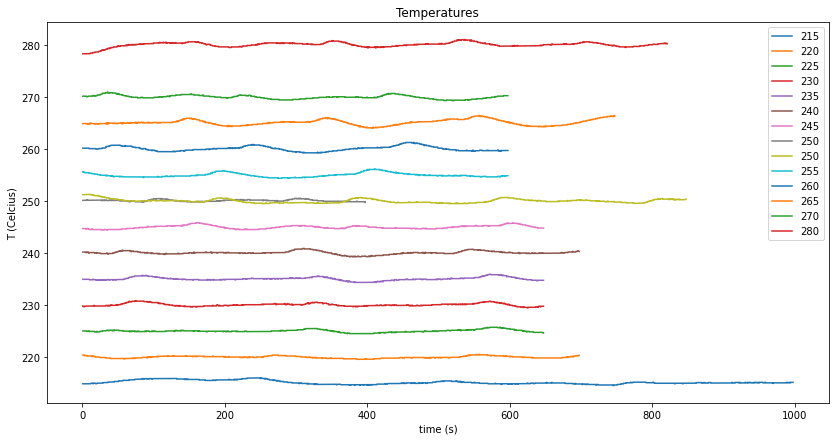

In [15]:
ta1s = []
ta2s = []

for df, t in zip(dft1, temps1):
    plt.plot(df['time'], df['hz1'], label=t)
    ta1s.append(TA(df))

for df, t in zip(dft2, temps2):
    plt.plot(df['time'], df['hz1'], label=t)
    ta2s.append(TA(df))

plt.legend()
plt.title('Temperatures')
plt.xlabel('time (s)')
plt.ylabel('T (Celcius)')
plt.show()